/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

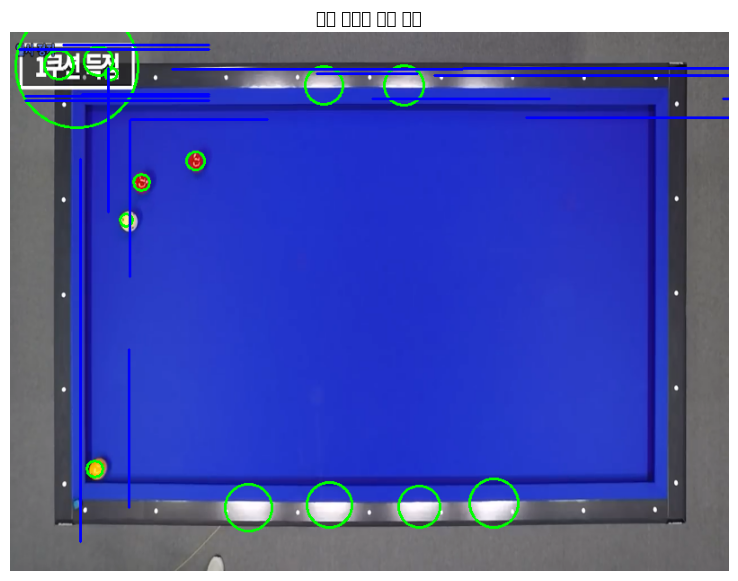

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image_path = "/content/drive/MyDrive/AIFFEL/Aiffelthon/ModelTest/onlyball1.png"
image = cv2.imread(image_path)
original_image = image.copy()

# 이미지 크기 조정
image = cv2.resize(image, (800, 600))

# BGR을 HSV로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 공의 색 범위 설정 (흰색, 노란색, 빨간색 필터링)
white_lower = np.array([0, 0, 200])
white_upper = np.array([180, 30, 255])

yellow_lower = np.array([20, 100, 100])
yellow_upper = np.array([30, 255, 255])

red_lower1 = np.array([0, 100, 100])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([160, 100, 100])
red_upper2 = np.array([180, 255, 255])

# 마스크 생성
mask_white = cv2.inRange(hsv, white_lower, white_upper)
mask_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)
mask_red1 = cv2.inRange(hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(hsv, red_lower2, red_upper2)
mask_red = mask_red1 | mask_red2

# 모든 마스크 합치기
full_mask = mask_white | mask_yellow | mask_red

# 공 영역 검출
contours, _ = cv2.findContours(full_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # 윤곽선 크기 필터링
    if cv2.contourArea(contour) > 100:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(image, center, radius, (0, 255, 0), 2)  # 공을 녹색 원으로 표시

# 당구대 프레임 검출 (가장 큰 직사각형 추출)
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# 선을 그려 당구대 프레임 시각화
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # 파란색으로 당구대 프레임 표시

# 이미지 출력
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("공과 프레임 검출 결과")
plt.axis("off")
plt.show()
